In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Number of training images per category:')

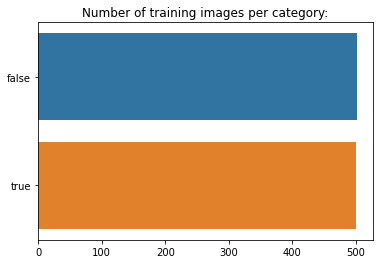

In [ ]:
train_data_dir = "/content/drive/My Drive/Datasets/train"
val_data_dir = "/content/drive/My Drive/Datasets/val"
test_data_dir = "/content/drive/My Drive/Datasets/test"
category_names = sorted(os.listdir('/content/drive/My Drive/Datasets/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/My Drive/Datasets/train' + '/' + category
    img_pr_img.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_img).set_title("Number of training images per category:")

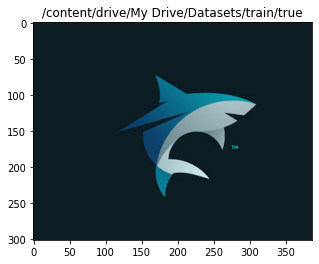

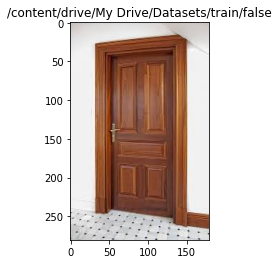

In [ ]:
for subdir, dirs, files in os.walk('/content/drive/My Drive/Datasets/train'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [ ]:
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f3587b0cdd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f354ad0ca58> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f354adca160> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f354ad0cf60> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f354ad82da0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f354ad16cf8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f35447d2400> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f35447d2ba8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f35447daa20> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f35447daac8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f35447dea20> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f35447eb

In [ ]:
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

#for layer in conv_base.layers[:-13]:
#    layer.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 14,715,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )

test_datagen =  ImageDataGenerator(
    rescale=1./255
)

# batches of augmented image data

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,  
save_prefix='aug', 
save_format='jpg',
class_mode = "categorical")

print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)


Total number of images for "training":
Found 1003 images belonging to 2 classes.
Total number of images for "validation":
Found 12 images belonging to 2 classes.
Total number of images for "testing":
Found 20 images belonging to 2 classes.


In [ ]:
epochs = 10
checkpoint = ModelCheckpoint("golden_classifier.h5", monitor = 'acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 1.1247 - acc: 0.5065 
Epoch 00001: acc improved from -inf to 0.50648, saving model to golden_classifier.h5
32/32 [==============================] - 1578s 49s/step - loss: 1.1247 - acc: 0.5065 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.7022 - acc: 0.4995 
Epoch 00002: acc did not improve from 0.50648
32/32 [==============================] - 1575s 49s/step - loss: 0.7022 - acc: 0.4995 - val_loss: 0.7013 - val_acc: 0.5000
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.6921 - acc: 0.5314 
Epoch 00003: acc improved from 0.50648 to 0.53141, saving model to golden_classifier.h5
32/32 [==============================] - 1572s 49s/step - loss: 0.6921 - acc: 0.5314 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)


Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 90.0% 


In [ ]:
test_subset_data_dir = "/content/drive/My Drive/Datasets/test"

test_subset_generator = test_datagen.flow_from_directory(
test_subset_data_dir,
batch_size = batch_size,
target_size = (img_height, img_width),
class_mode = "binary",
shuffle=False)

Found 20 images belonging to 2 classes.


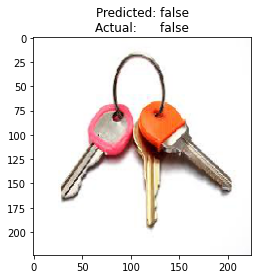

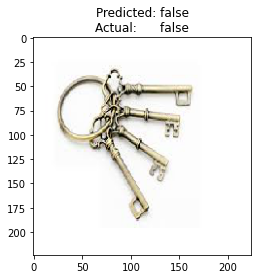

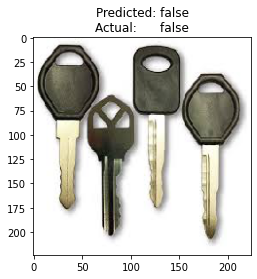

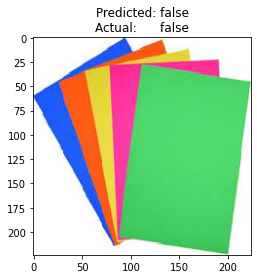

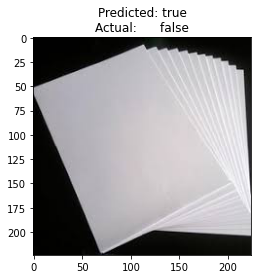

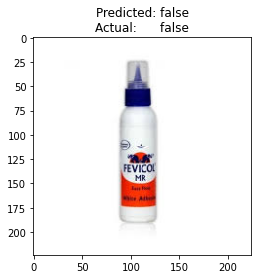

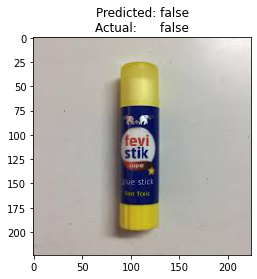

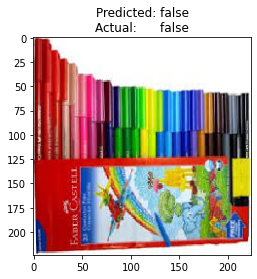

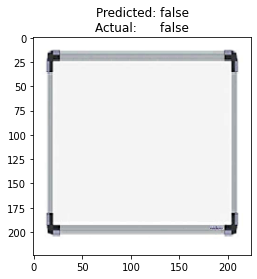

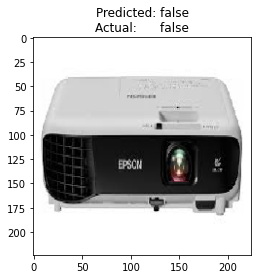

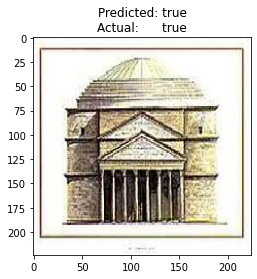

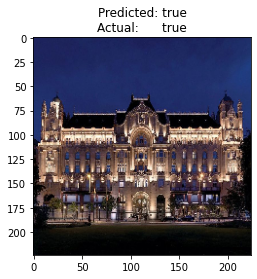

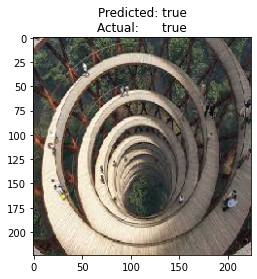

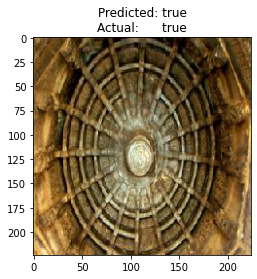

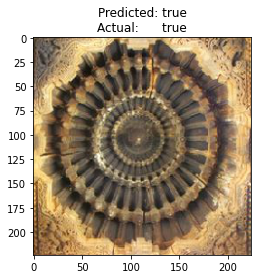

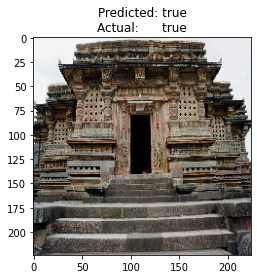

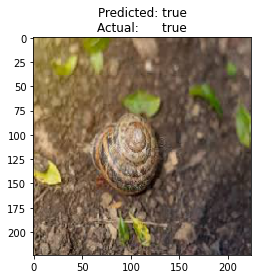

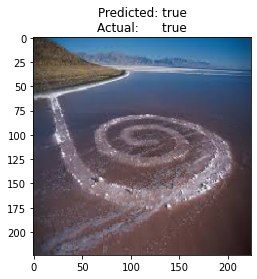

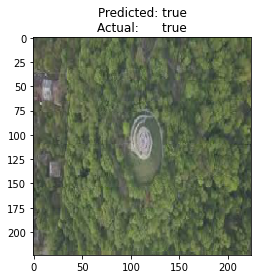

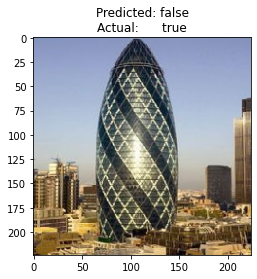

In [ ]:
Y_pred = model.predict_generator(test_subset_generator)
y_pred = np.argmax(Y_pred, axis=1)

img_nr = 0
for subdir, dirs, files in os.walk('/content/drive/My Drive/Datasets/test'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file,target_size=(img_height,img_width))
        pred_emotion = category_names[y_pred[img_nr]]
        real_emotion = category_names[test_subset_generator.classes[img_nr]]
        plt.figure()
        plt.title('Predicted: ' + pred_emotion + '\n' + 'Actual:      ' + real_emotion)
        plt.imshow(image)
        img_nr = img_nr +1

In [ ]:
from google.colab import files

In [ ]:
files.download("golden_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.predict_classes(test_generator)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
files.download("ratio_aug1.h5")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("golden_classifier.h5")

In [ ]:
model.predict_classes(test_generator)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])